<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/Claensing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import missingno as mno
from sklearn import linear_model
%matplotlib inline

In [2]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data_file_path = os.path.join(path,'dataset.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data = pd.read_csv(data_file_path) #อ่านไฟล์ csv

Mounted at /content/drive


In [3]:
data

,No.,LabNo,Sex,AgeSYear,Enose,Overall,Body shape age,Kidney,Heart,Liver,...,071_HbA1c,CK,LD-P,AMY7,TP1,DBIL,TBIL,ALB1,GGT,homocysteine
0,50.0,2.01809E+11,2,58,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,89.0,112.0,100.0,7.10,0.13,1.03,4.52,3.0,10.54
1,57.0,2.01809E+11,2,57,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1,94.0,263.0,98.0,7.29,0.08,0.36,4.40,8.0,9.62
2,86.0,2.0181E+11,2,24,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,78.0,402.0,72.0,6.99,0.04,0.35,4.57,11.0,11.58
3,104.0,2.0181E+11,2,62,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6,251.0,403.0,166.0,7.54,0.07,0.40,4.23,21.0,9.41
4,109.0,2.01811E+11,2,86,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,25.0,376.0,46.0,6.92,0.22,0.60,3.55,17.0,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,NaN,V14,2,25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,NaN,V17,2,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,NaN,V19,2,32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,NaN,V21,1,29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.dropna(subset=['telomere length (kb) '])

In [5]:
data=data.drop(['No.', 'LabNo'], axis=1)

In [6]:
data=data.drop(data.columns[2: 10], axis=1)

In [7]:
missing = data.isna().sum()
missing

Sex                          0
AgeSYear                     0
telomere length (kb)         0
DHEAs (BRIA)               218
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
CK                         249
LD-P                       249
AMY7                       249
TP1                        249
DBIL    

In [8]:
data.isna().mean().round(4)*100

Sex                         0.00
AgeSYear                    0.00
telomere length (kb)        0.00
DHEAs (BRIA)               51.54
Weight                      1.89
Height                      1.89
BMI                         1.89
Systolic                    1.89
Diastolic                   2.13
HeartRate                  12.06
SMM                        53.19
Fat Mass                   53.19
% Body fat                 53.19
waist to hip radio         53.19
abdominal circumference    53.43
visceral fat area          53.19
001_Glucose                 0.24
002_BUN                     0.00
003_Creatinine              0.00
004_Uric Acid              21.99
005_Cholesterol             0.00
006_Triglyceride            0.00
008_HDL-C                   0.00
009_LDL                     0.00
010_AST                     0.00
012_ALT                     0.24
013_Alkaline Phos           6.86
071_HbA1c                  39.48
CK                         58.87
LD-P                       58.87
AMY7      

In [9]:
data=data.drop(data.columns[28:37], axis=1)

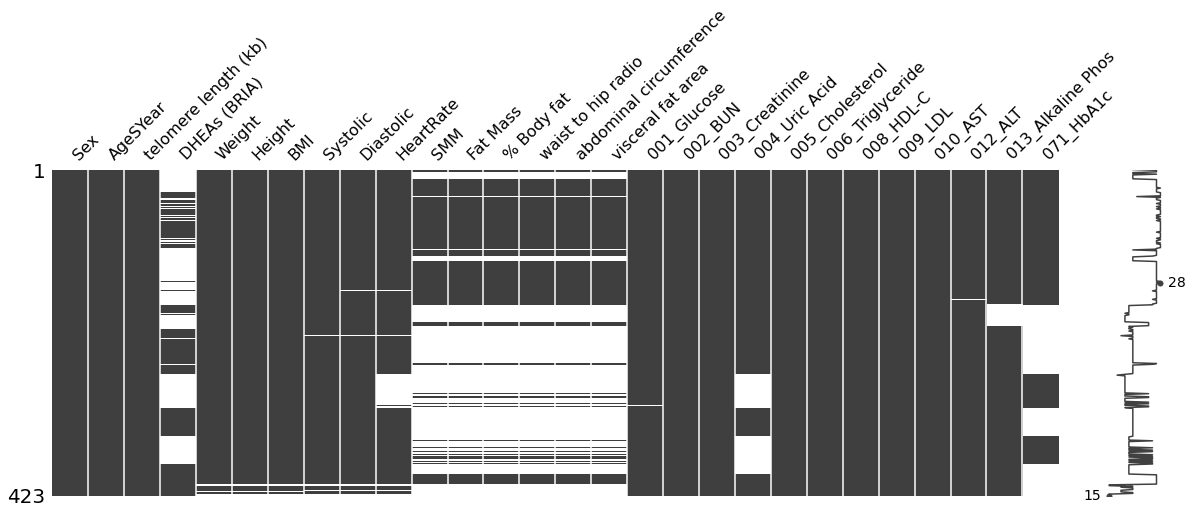

In [10]:
mno.matrix(data, figsize = (20, 6))

In [11]:
data = data.dropna(subset=['Diastolic'])
data = data.dropna(subset=['BMI'])
data = data.dropna(subset=['012_ALT'])
data = data.dropna(subset=['001_Glucose'])

In [12]:
data=data.drop(data.columns[10:16], axis=1)

In [13]:
data=data.drop(data.columns[3], axis=1)

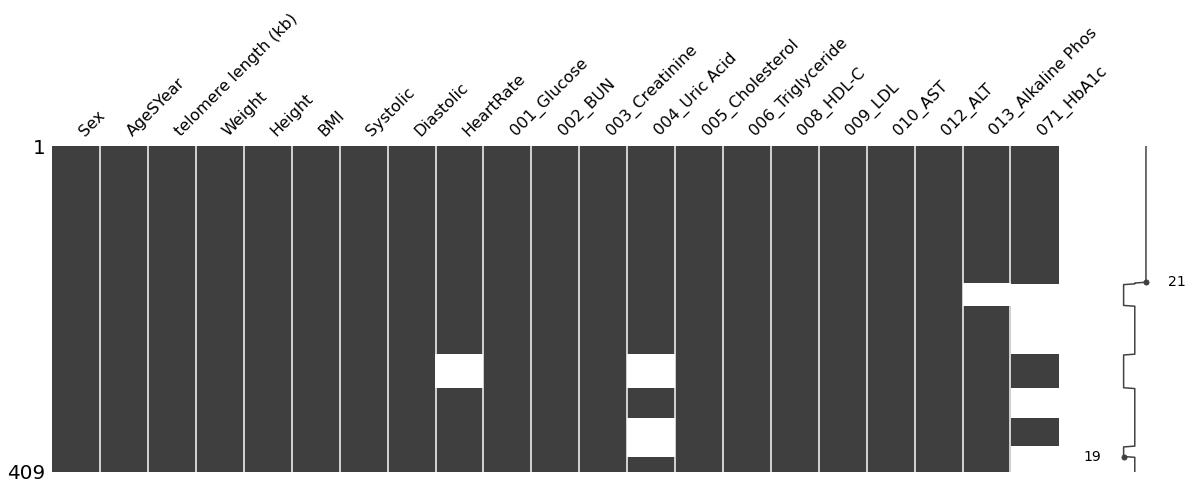

In [14]:
mno.matrix(data, figsize = (20, 6))

In [15]:
data.isna().mean().round(4)*100

Sex                       0.00
AgeSYear                  0.00
telomere length (kb)      0.00
Weight                    0.00
Height                    0.00
BMI                       0.00
Systolic                  0.00
Diastolic                 0.00
HeartRate                10.27
001_Glucose               0.00
002_BUN                   0.00
003_Creatinine            0.00
004_Uric Acid            22.25
005_Cholesterol           0.00
006_Triglyceride          0.00
008_HDL-C                 0.00
009_LDL                   0.00
010_AST                   0.00
012_ALT                   0.00
013_Alkaline Phos         7.09
071_HbA1c                38.39
dtype: float64

In [16]:
scr = data['003_Creatinine']
age = data['AgeSYear']
for j in scr:
  if j > 0.7:
    GFR = 144*((scr/0.7)**(-1.209))*((0.993)**age)
  else:
    GFR = 144*((scr/0.7)**(-0.329))*((0.993)**age)
print(GFR)

0      100.796255
1       85.803877
2      116.430056
3       93.157087
4       78.704192
          ...    
412    134.949049
413     97.368939
414    121.846957
418    127.092288
419    121.846957
Length: 409, dtype: float64


In [17]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,001_Glucose,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
0,2,58,7.30,47.2,156.0,19.4,112.0,64.0,70.0,100.0,...,0.6,4.8,180,97,62,98,25,32.0,40.0,5.8
1,2,57,6.36,47.4,153.0,20.2,114.0,75.0,69.0,81.0,...,1.0,5.0,176,51,72,94,16,16.0,62.0,5.1
2,2,24,9.71,53.2,157.0,21.6,103.0,69.0,78.0,79.0,...,0.8,5.2,159,45,52,98,13,17.0,50.0,5.4
3,2,62,6.17,54.4,165.0,20.0,95.0,75.0,83.0,89.0,...,0.7,4.1,230,94,61,151,18,31.0,76.0,5.6
4,2,86,4.55,49.0,154.0,20.7,129.0,79.0,83.0,108.0,...,0.7,5.4,183,86,39,127,12,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2,25,8.35,58.9,168.0,20.9,111.0,72.0,69.0,83.0,...,0.5,4.6,232,42,60,163,20,22.0,31.0,NaN
413,1,39,7.72,54.0,163.0,20.3,106.0,61.0,72.0,91.0,...,1.0,7.1,182,121,38,120,20,19.0,53.0,NaN
414,2,31,8.54,52.0,155.0,21.6,122.0,76.0,55.0,75.0,...,0.6,3.1,184,39,80,96,25,7.0,51.0,NaN
418,2,25,8.98,47.0,165.0,17.3,104.0,63.0,89.0,82.0,...,0.6,4.8,232,36,96,128,18,12.0,46.0,NaN


In [18]:
for sex,creatine,age in zip(data['Sex'], data['003_Creatinine'],data['AgeSYear']):
  if sex == 2:
    if creatine <= 0.7:
      GFR = 144*((creatine/0.7)**(-0.329))*(0.993**age)
    else:
      GFR = 144*((creatine/0.7)**(-1.209))*(0.993**age)
  else:
    if creatine <= 0.9:
      GFR = 141*((creatine/0.9)**(-0.411))*(0.993**age)
    else :
      GFR = 141*((creatine/0.9)**(-1.209))*(0.993**age)
  print(GFR)

100.7962554763551
62.68926625929596
103.52188994599281
93.15708678963531
78.7041916400716
124.91412830822503
118.47089877354612
93.15899053126684
71.07749408488438
103.50877560225479
91.22600678453652
79.82784151223106
76.53320088019517
102.06681045036034
67.2990959788653
94.48707883301493
80.8030064393613
112.78631895932605
112.78631895932605
105.71325026977526
101.25733965467481
84.28145585927399
86.07643733115866
107.96467466239355
123.3803389476931
88.07748547883388
97.17967192042369
112.612393559243
97.86472499539143
74.20125022569226
102.06472467382774
121.45308638705214
134.9490489481188
123.3803389476931
97.17967192042369
114.38206312194025
142.20044909712016
124.03972941006747
73.60561791734244
93.16888959621555
112.78631895932605
74.27086839353403
100.64081969990315
93.15708678963531
95.14109671278315
107.2089219397568
108.89367758706985
103.51089088915494
87.45165047691253
77.46811897199832
82.95616007800504
87.44986336708223
86.84871647891867
101.35027160111093
109.66130673